# CSES Population Survey Voting Prediction - CSSM 502 Homework 3 

# Importing the Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

# Reading the Data 

In [2]:
df = pd.read_csv("cses4_cut.csv") #reading the data

In [3]:
df.drop(["Unnamed: 0"], axis=1, inplace=True) #unnecessary index-like column 

In [4]:
df.head()

,D2002,D2003,D2004,D2005,D2006,D2007,D2008,D2009,D2010,D2011,...,D2024,D2025,D2026,D2027,D2028,D2029,D2030,D2031,age,voted
0,1,4,4,2,2,9,9,9,1,422,...,9,9,8300,121,8,999,999,4,31,True
1,2,3,1,2,2,9,9,9,8,999,...,6,9,1101,121,12,999,999,4,42,True
2,2,2,1,2,2,9,9,9,7,818,...,5,9,1101,121,2,999,999,4,67,True
3,2,4,4,2,2,9,9,9,5,513,...,9,9,8300,121,2,999,999,4,26,False
4,1,6,4,1,1,9,9,9,1,235,...,1,9,1101,121,2,999,999,4,55,True


In [5]:
df["voted"].value_counts() #voted value counts

True     10226
False     2225
Name: voted, dtype: int64

In [6]:
df.corr().loc['voted'] #correlation of every feature with the target

D2002   -0.003137
D2003    0.021504
D2004   -0.099384
D2005   -0.012776
D2006   -0.073673
D2007   -0.110156
D2008   -0.109979
D2009   -0.110155
D2010   -0.027552
D2011   -0.132420
D2012   -0.118547
D2013   -0.163838
D2014   -0.181962
D2015   -0.116749
D2016   -0.090799
D2017   -0.094490
D2018   -0.121979
D2019   -0.127375
D2020   -0.024156
D2021   -0.170686
D2022    0.107088
D2023   -0.097532
D2024    0.026272
D2025   -0.131028
D2026   -0.061747
D2027   -0.099579
D2028   -0.126310
D2029    0.078233
D2030   -0.069317
D2031   -0.067071
age      0.256741
voted    1.000000
Name: voted, dtype: float64

In [7]:
df.columns #columns 

Index(['D2002', 'D2003', 'D2004', 'D2005', 'D2006', 'D2007', 'D2008', 'D2009',
       'D2010', 'D2011', 'D2012', 'D2013', 'D2014', 'D2015', 'D2016', 'D2017',
       'D2018', 'D2019', 'D2020', 'D2021', 'D2022', 'D2023', 'D2024', 'D2025',
       'D2026', 'D2027', 'D2028', 'D2029', 'D2030', 'D2031', 'age', 'voted'],
      dtype='object')

Printing the value counts for every column to see which variables are the best predictors, which have the least missing values. 

In [8]:
for c in df.columns: 
    print ("---- %s ---" % c)
    print (df[c].value_counts()) 

---- D2002 ---
2    6623
1    5828
Name: D2002, dtype: int64
---- D2003 ---
4     4297
2     2184
3     2160
7     1214
1      766
5      572
6      565
8      436
96     168
9       49
97      20
99      18
98       2
Name: D2003, dtype: int64
---- D2004 ---
1    7607
4    2592
3     857
9     738
2     621
7      27
8       9
Name: D2004, dtype: int64
---- D2005 ---
2    10472
9     1108
1      789
8       54
7       28
Name: D2005, dtype: int64
---- D2006 ---
2    9552
9    2206
1     564
8      90
7      39
Name: D2006, dtype: int64
---- D2007 ---
9    7086
2    5211
1      93
8      42
7      19
Name: D2007, dtype: int64
---- D2008 ---
9    7087
2    5192
1     113
8      41
7      18
Name: D2008, dtype: int64
---- D2009 ---
9    7086
2    5145
1     159
8      43
7      18
Name: D2009, dtype: int64
---- D2010 ---
1     6068
7     1827
8     1626
5      909
2      708
6      466
9      279
3      229
10     186
4       49
97      42
11      40
98      19
99       3
Name: D2010, dt

1. D2002, 9=0 (Excellent percentage)

2. D2003, 99=18 (Good percentage)

3. D2004 9=738 (10% missing) 

4. D2005 9=1108 (12% missing) 
 
5. D2006 9=2206 (15% missing) 

5. D2007 9=7086 (Majority missing) 

6. D2008 9=7087 (Majority missing) 

7. D2009 9=7086 (Majority missing)

8. D2010 99=3 (Excellent) 

9. D2011 999=7566 (Majority missing) 

10. D2012 9=6556 (Majority missing) 

11. D2013 9=5227 (Majority missing) 

12. D2014 9=5398 (Almost half of it missing) 

13. D2015 99=7063 (Majority missing) 

14. D2016 999= 10444(Huge majority missing) 

15. D2017 9=10481 (Huge majority missing) 

16. D2018 9=9214 (Huge majority missing) 

17. D2019 9=9132 (Huge majority missing)

18. D2020 9=382 (Good percentage)

19. D2021 99=1887 (Not bad)

20. D2022 99=3417 (Almost half of it missing) 

21. D2023 99=4048 (Almost half of it missing)

22. D2024 9=239 (Really good) 

23. D2025 9=2539 (Half of it missing) 

24. D2026 9=0 (Excellent)

25. D2027 999=4823 (Majority missing) 

26. D2028 99=1103 (Almost two thirds missing) 

27. D2029 999=5539 (Almost half of it missing) 

28. D2030 999=10072 (Huge majority missing) 

29. D2031 9=4822 (Almost half of it missing) 



By looking at these approximations, intuitively, we can see that;

1.D2002 (Sex), 

2.D2003 (Education),

3.D2010 (Current Employment Status),

4.D2020 (Household Income),

5.D2021(Number in Household Total),

6.D2024(Religious Services Attendance),

are the features with the least missing values and make theoratical sense which might suggest that we might build our model on them. 

In [9]:
X = df[['D2002', 'D2003', 'D2010', 'D2020', 'D2021','D2024','age']]
corr_X = df[['D2002', 'D2003', 'D2010', 'D2020', 'D2021','D2024','age','voted']]
y = df["voted"]

In [10]:
X

,D2002,D2003,D2010,D2020,D2021,D2024,age
0,1,4,1,3,3,9,31
1,2,3,8,1,5,6,42
2,2,2,7,9,3,5,67
3,2,4,5,9,7,9,26
4,1,6,1,5,2,1,55
...,...,...,...,...,...,...,...
12446,2,4,1,2,99,1,62
12447,1,3,9,1,99,1,65
12448,2,6,1,3,99,4,61
12449,2,7,1,4,99,6,53


# Imputing the missing values 

Imputing the missing values with the most frequent values in the column. 

In [11]:
imp_freq_9 = SimpleImputer(missing_values=9, strategy="most_frequent")
imp_freq_99 = SimpleImputer(missing_values=99, strategy="most_frequent")

In [12]:
d2003imp = imp_freq_99.fit_transform(X["D2003"].to_numpy().reshape(-1,1))
d2024imp = imp_freq_9.fit_transform(X["D2024"].to_numpy().reshape(-1,1))
d2010imp = imp_freq_99.fit_transform(X["D2010"].to_numpy().reshape(-1,1))
d2021imp = imp_freq_99.fit_transform(X["D2021"].to_numpy().reshape(-1,1))
d2020imp = imp_freq_9.fit_transform(X["D2020"].to_numpy().reshape(-1,1));

In [13]:
X["D2024"] = d2024imp
X["D2003"] = d2003imp
X["D2010"] = d2010imp
X["D2020"] = d2020imp
X["D2021"] = d2021imp
corr_X["D2024"] = d2024imp
corr_X["D2003"] = d2003imp
corr_X["D2010"] = d2010imp
corr_X["D2020"] = d2020imp
corr_X["D2021"] = d2021imp

<ipython-input-13-d64b23eccb3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["D2024"] = d2024imp
<ipython-input-13-d64b23eccb3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["D2003"] = d2003imp
<ipython-input-13-d64b23eccb3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [14]:
X["D2024"].value_counts() #checking...notice there are no 9's (the missing value)

6    3372
2    2569
1    2009
3    1730
4    1562
5    1104
7      55
8      50
Name: D2024, dtype: int64

In [15]:
corr_X.corr().loc['voted'] #the correlations of the features to the voting behavior. 

D2002   -0.003137
D2003    0.025623
D2010   -0.026797
D2020    0.004726
D2021   -0.037548
D2024    0.032967
age      0.256741
voted    1.000000
Name: voted, dtype: float64

# One-Hot Coding

In [16]:
voted = pd.get_dummies(y,prefix="Voted",drop_first=True)

In [17]:
xdum = pd.get_dummies(data=X, columns= ['D2002', 'D2003', 'D2010', 'D2020', 'D2021','D2024'],drop_first=True)

In [18]:
data =  pd.concat([xdum,voted], axis=1)

# Train-test split 

In [19]:
X = data.iloc[:,:-1]
y = data["Voted_True"]

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=1)

# Classifier Algorithms

Trying out many algorithms to find the best fit. 

## GaussianNB Classifier

In [21]:
model = GaussianNB()
model.fit(Xtrain, ytrain) 
predictGNB = model.predict(Xtest)

In [22]:
accuracy_score(ytest,predictGNB) 

0.6081771720613288

In [23]:
print(confusion_matrix(ytest,predictGNB)) #printing out the confusion matrix and the classification report for Gaussian Naive Bayes 
print("\n")
print(classification_report(ytest,predictGNB))

[[ 494  248]
 [1362 2005]]


              precision    recall  f1-score   support

           0       0.27      0.67      0.38       742
           1       0.89      0.60      0.71      3367

    accuracy                           0.61      4109
   macro avg       0.58      0.63      0.55      4109
weighted avg       0.78      0.61      0.65      4109



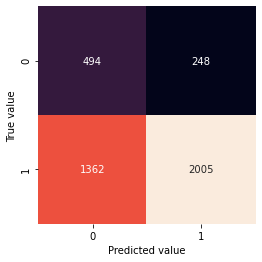

In [24]:
np.set_printoptions(suppress=True) 
matNB = confusion_matrix(ytest, predictGNB) 
sns.heatmap(matNB, square=True, annot=True, cbar=False,fmt="g"); #Visualizing the GNB Confusion Matrix
plt.xlabel('Predicted value');
plt.ylabel('True value');

In [25]:
from sklearn.model_selection import cross_val_score #GNB cross-validation score 
np.mean(cross_val_score(model, X, y, cv=5))  

0.4660757199814916

### Leave One Out 

In [ ]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut()) #loo
scores
scores.mean()

## Logistic Regression 

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)
predictLR = lr.predict(Xtest)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
accuracy_score(ytest,predictLR) 

0.8291555122900949

In [29]:
print(confusion_matrix(ytest,predictLR))
print("\n")
print(classification_report(ytest,predictLR)) #Logistic Regression confusion matrix and classification report

[[ 109  633]
 [  69 3298]]


              precision    recall  f1-score   support

           0       0.61      0.15      0.24       742
           1       0.84      0.98      0.90      3367

    accuracy                           0.83      4109
   macro avg       0.73      0.56      0.57      4109
weighted avg       0.80      0.83      0.78      4109



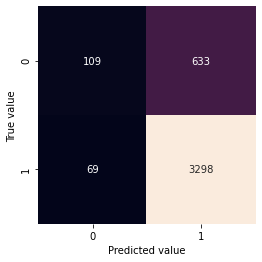

In [30]:
np.set_printoptions(suppress=True) 
matLR = confusion_matrix(ytest, predictLR)
sns.heatmap(matLR, square=True, annot=True, cbar=False,fmt="g"); #visualizing the Logistic Regression confusion matrix 
plt.xlabel('Predicted value');
plt.ylabel('True value');

In [31]:
from sklearn.model_selection import cross_val_score 
np.mean(cross_val_score(lr, X, y, cv=5))  #Logistic Regression cross-validation score  

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8309368183291174

## KNeighbors Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(Xtrain, ytrain) 
predictKN = model.predict(Xtest)

In [33]:
accuracy_score(ytest, predictKN)

0.8366999269895352

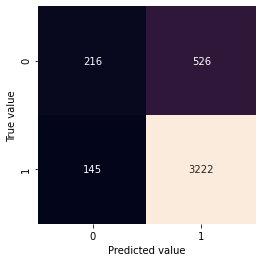

In [34]:
np.set_printoptions(suppress=True)  
matKN = confusion_matrix(ytest, predictKN) #visualizing the KNeighbors confusion matrix
sns.heatmap(matKN, square=True, annot=True, cbar=False,fmt="g");
plt.xlabel('Predicted value');
plt.ylabel('True value');

In [35]:
print(confusion_matrix(ytest,predictKN))
print("\n")
print(classification_report(ytest,predictKN)) #KNeighbors confusion matrix and classification report 

[[ 216  526]
 [ 145 3222]]


              precision    recall  f1-score   support

           0       0.60      0.29      0.39       742
           1       0.86      0.96      0.91      3367

    accuracy                           0.84      4109
   macro avg       0.73      0.62      0.65      4109
weighted avg       0.81      0.84      0.81      4109



## Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(Xtrain, ytrain)
predictRF = model.predict(Xtest)

In [37]:
accuracy_score(ytest,predictRF)

0.8332927719639815

In [38]:
np.mean(cross_val_score(model, X, y, cv=5))

0.8164789225146268

In [39]:
print(confusion_matrix(ytest,predictRF))
print("\n")
print(classification_report(ytest,predictRF)) #Random Forest confusion matrix and classification report

[[ 235  507]
 [ 178 3189]]


              precision    recall  f1-score   support

           0       0.57      0.32      0.41       742
           1       0.86      0.95      0.90      3367

    accuracy                           0.83      4109
   macro avg       0.72      0.63      0.65      4109
weighted avg       0.81      0.83      0.81      4109



## Support Vector Machine

In [40]:
from sklearn.svm import SVC

In [41]:
model = SVC()
model.fit(Xtrain,ytrain)
predictSVC = model.predict(Xtest)

In [42]:
accuracy_score(ytest,predictSVC)

0.8194207836456558

In [43]:
print(confusion_matrix(ytest,predictSVC))
print("\n")
print(classification_report(ytest,predictSVC)) #Seems really problematic in predicting the false voting results. 

[[   0  742]
 [   0 3367]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       742
           1       0.82      1.00      0.90      3367

    accuracy                           0.82      4109
   macro avg       0.41      0.50      0.45      4109
weighted avg       0.67      0.82      0.74      4109



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Tuning 

Here we can see that our models are predicting 1s disproportionately. The reason for that might be because the model parameters need adjusting or the model doesn't have enough False voting data to learn to classify them correctly.  We will be doing the tuning via the GridSearchCV.

## Grid Search 

### Tuning the SVC model

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {"C":[0.1,1,10,100,1000], "gamma":[1,0.1,0.01,0.001,0.0001],'kernel': ['rbf']} 
#This is the grid I will feed to the GridSearchCV which contains the parameters to tune 

In [49]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(Xtrain,ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   7.1s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   7.6s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   6.7s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   6.8s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   6.7s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   4.9s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   4.7s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   4.3s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   4.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   4.1s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   2.9s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [50]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [51]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [52]:
grid_predictions = grid.predict(Xtest)

In [53]:
print(confusion_matrix(ytest,grid_predictions)) #tuning the SVC algorithm generates much better results, but still, the model needs to be improved or data sample size should be increased. 
print("\n")
print(classification_report(ytest,grid_predictions))

[[ 201  541]
 [  88 3279]]


              precision    recall  f1-score   support

           0       0.70      0.27      0.39       742
           1       0.86      0.97      0.91      3367

    accuracy                           0.85      4109
   macro avg       0.78      0.62      0.65      4109
weighted avg       0.83      0.85      0.82      4109



Please check out pdf for more detailed information.